# Principal Component Analysis - Test tasks

-----
-----

## Goal: Use principal component analysis to find out which handwritten numbers differ most from each other.

**Imagine that you are working on an image recognition task for a postal company. It would be very useful to read numbers automatically, even if they are written by hand (this is exactly what happens in postal companies now, and number recognition works even better than a person can do). The head of a postal company would like to find out which numbers are most difficult to recognize so that more labeled data can be obtained for these numbers. You will be working with a very famous dataset that contains handwritten numbers. Using principal component analysis, you can figure out which numbers are easier to distinguish from other numbers.**

-----
-----

# Data


Data source: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


## Complete the tasks written in bold

**Task: Run cells to import libraries and load data from a file into a dataframe.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = pd.read_csv('../DATA/digits.csv')

In [3]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


**Task: Create a new dataframe, call it *pixels*, which will contain only pixel values. To do this, remove the number_label column.**

In [4]:
pixel = digits.drop("number_label", axis=1)

In [5]:
pixel

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Display the image on the screen

**Task: take only one row of pixels - to do this, take the first row in the pixels dataframe.**

In [41]:
single_image = pixel.iloc[1]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

**Task: Convert the previously obtained Series object (the first row of the dataframe) into a numpy array.**

In [42]:
array_image = np.array(single_image)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**TASK: Reshape this numpy array to dimension (8,8) using reshape.**

In [44]:
array_image = array_image.reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**Task: Using Matplotlib or Seaborn, display this array on the screen - you should get an image of a handwritten number. Remember that palette/cmap parameters can change colors, but cannot change pixel values.**

<Axes: >

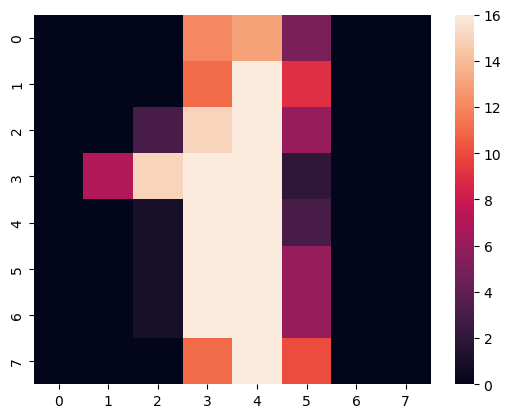

In [17]:
sns.heatmap(array_image)

<Axes: >

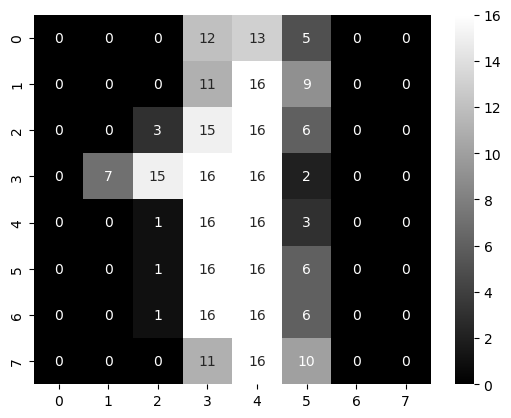

In [18]:
sns.heatmap(array_image,annot=True,cmap='gray')

------

Next we will move on to the principal component method.

## Data scaling

**Task: Use Scikit-Learn to scale a dataframe with pixels.**

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [57]:
scaled_pixel = scaler.fit_transform(pixel)

In [53]:
scaled_pixel

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## Principal Component Analysis (PCA)

**Assignment: Apply principal component analysis to a scaled set of pixels, selecting 2 principal components.**

In [28]:
from sklearn.decomposition import PCA

In [29]:
PCA_model = PCA(n_components=2)

In [58]:
pca_pixel = PCA_model.fit_transform(scaled_pixel)

In [59]:
pca_pixel[:,1]

array([-0.95456853,  0.92473796, -0.31723683, ..., -0.14794737,
       -0.38082442, -2.22774224])

**TASK: Find out how much variance is explained by these 2 main components.**

In [35]:
np.sum(PCA_model.explained_variance_ratio_)

0.2850936482369889

**TASK: Create a scatterplot for numbers in 2D principal component space, coloring the plot with different colors based on the number_label column in the original dataframe.**

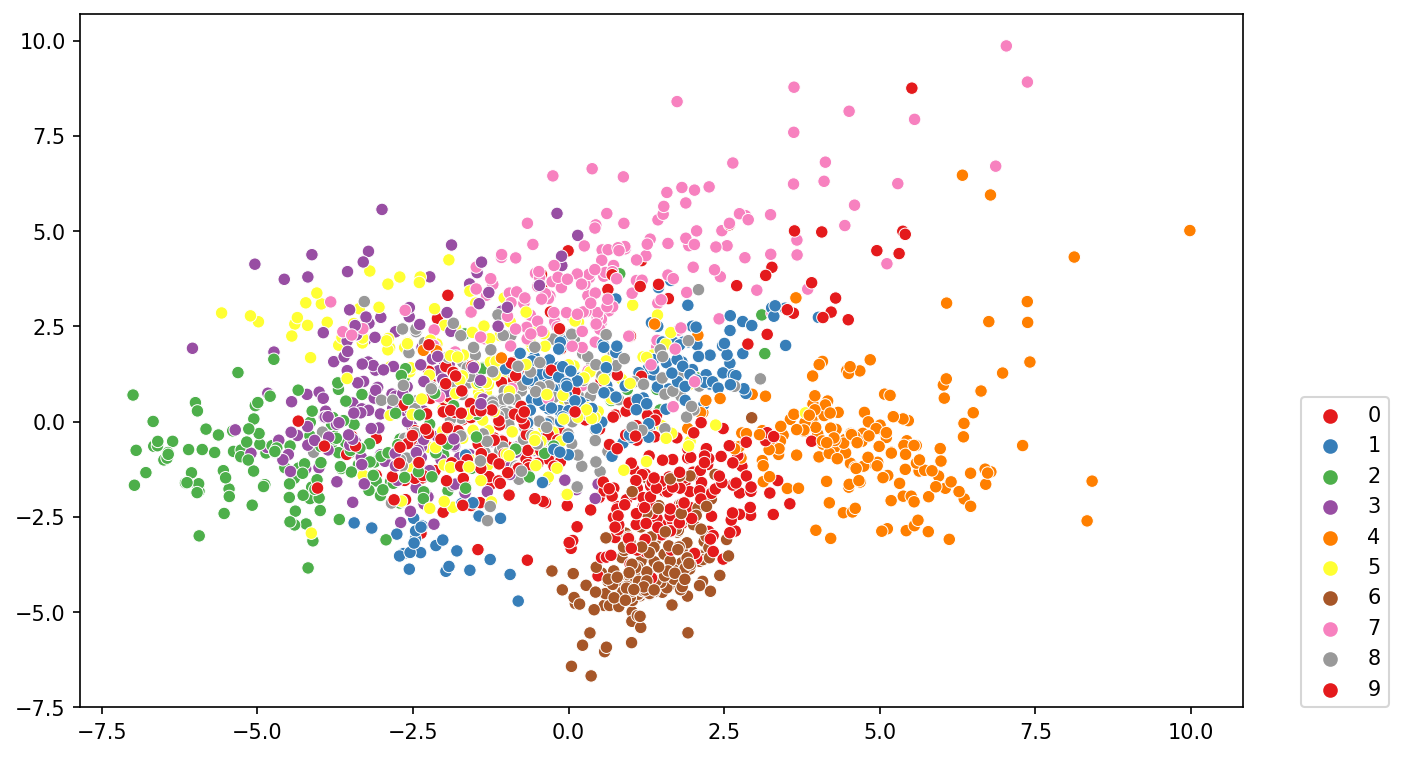

In [60]:
plt.figure(figsize=(10,6),dpi=150)
labels = digits['number_label']
sns.scatterplot(x = pca_pixel[:,0],y = pca_pixel[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))

In [53]:
labels

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: number_label, Length: 1797, dtype: int64

-----------
---------

## Bonus task

**Task: build an “interactive” 3D graph with the results of the principal component method for 3 principal components. This can be done in many ways using various libraries such as plotly or bokeh, but it can really only be done using Matplotlib and Jupyter Notebook. If necessary, look for a solution in Google or another search engine or on StackOverflow.**

In [55]:
pca_model = PCA(n_components=3)

In [61]:
pca_pixels = pca_model.fit_transform(scaled_pixel)

In [62]:
from mpl_toolkits import mplot3d

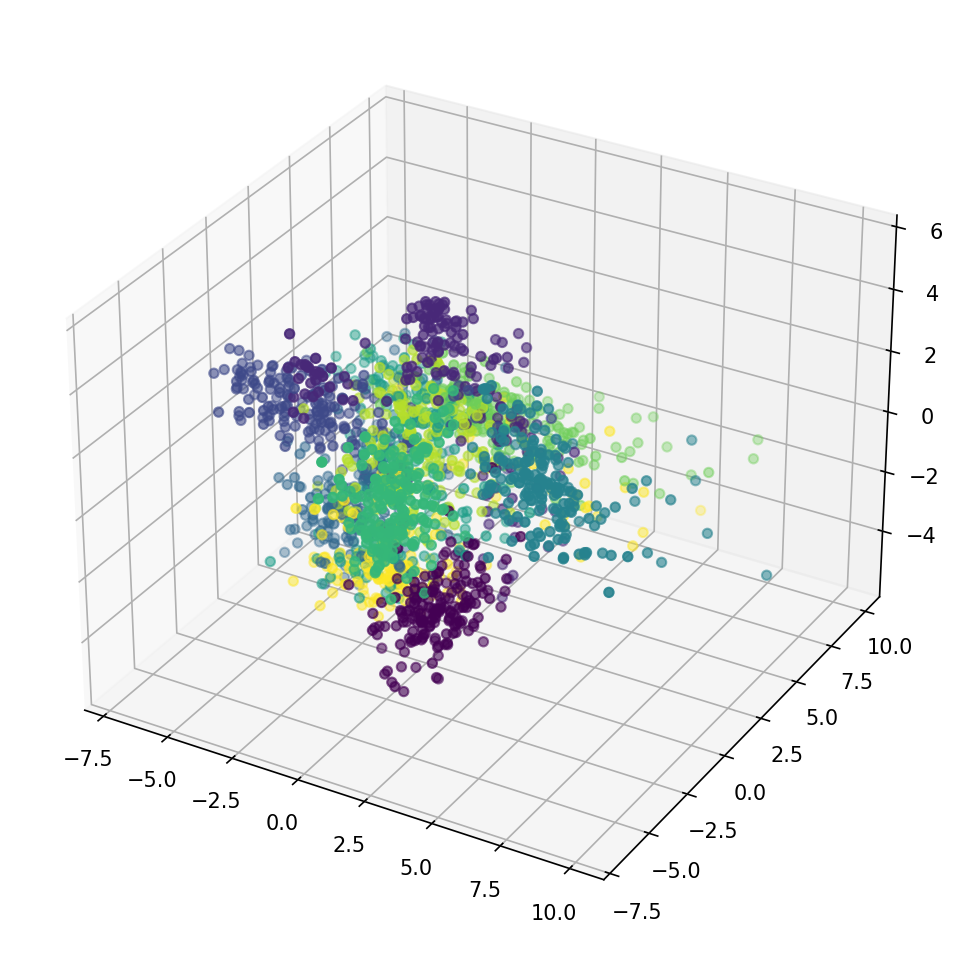

In [64]:
plt.figure(figsize=(8,8),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);

In [65]:
%matplotlib notebook

<IPython.core.display.Javascript object>


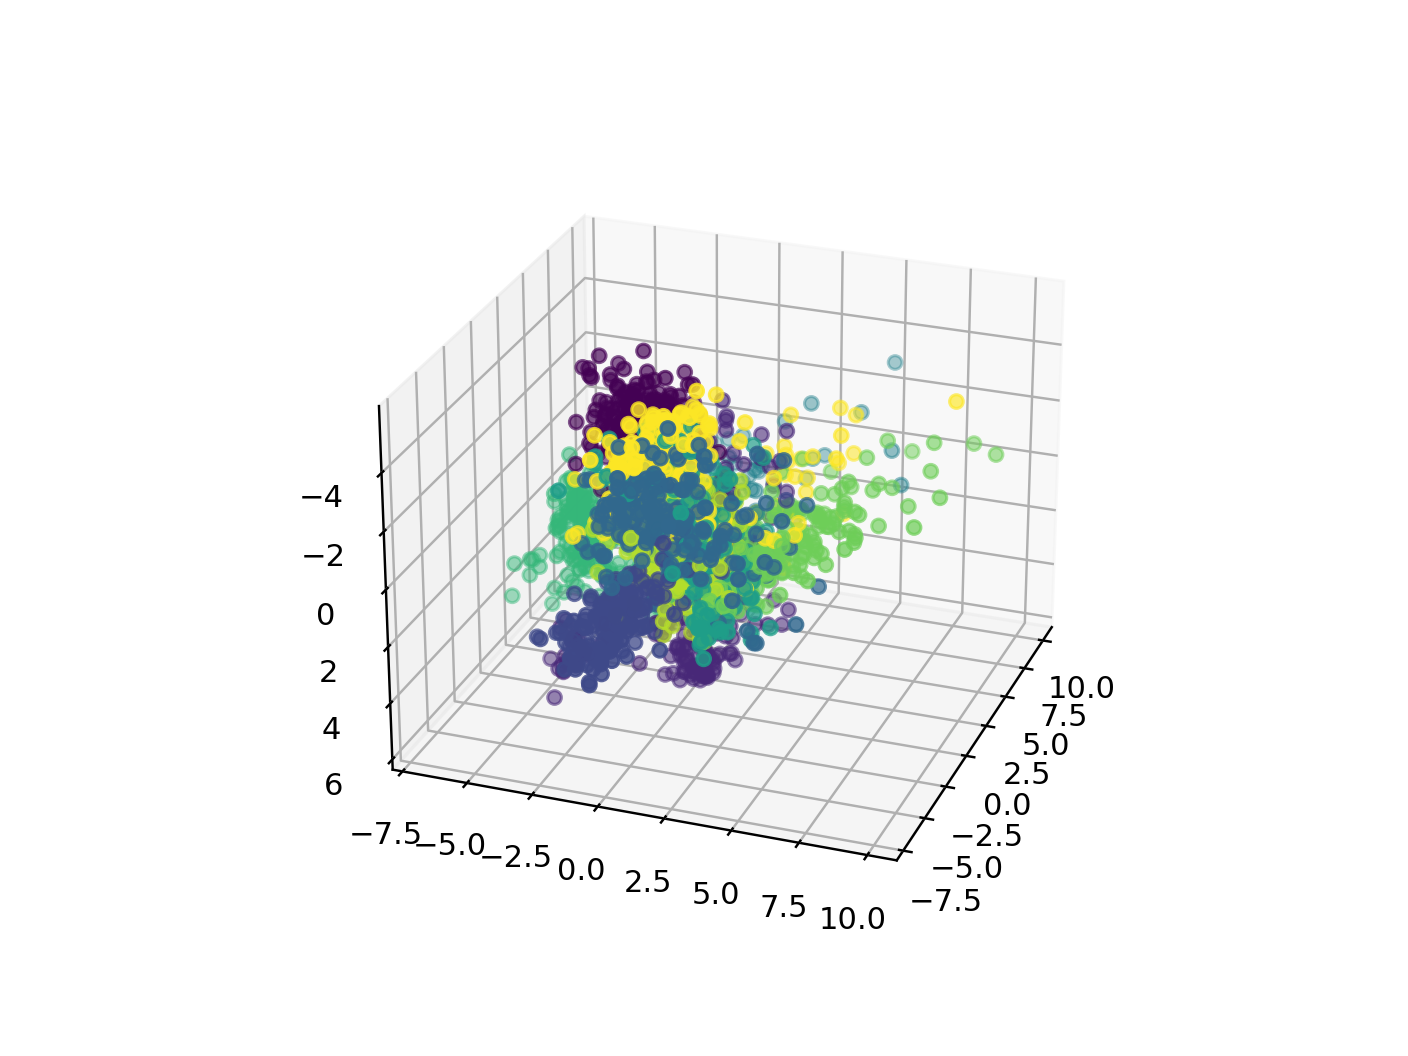

In [68]:
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);

# Great job!